<a href="https://www.kaggle.com/code/mipeichao/fertilizers-v1-0?scriptVersionId=258282169" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

I want to use the Kaggle dataset Predicting Optimal Fertilizers to practice data exploration. This dataset is quite intriguing because the optimal prediction has relatively low cross-validation accuracy, which I think is mainly due to the nature of the data itself.

My plan is to explore the dataset further and slightly reframe the original question to:

"How does each factor, and the combination of factors, influence the choice of fertilizer?"

For each condition, I’ll try to:

Rank the fertilizers.

Identify cases where different fertilizers receive very similar scores.

Compare these findings with the dataset to gain deeper insights.

References:<br>
1. dataset: [Predicting Optimal Fertilizers](https://www.kaggle.com/competitions/playground-series-s5e6/overview)<br>
2. A Comprehensive Guide to Data Exploration (https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)

In this Version 1, I applied univariate analysis to continuous variables, plotted the histogram and box plot, and found there are no outliers or skewness.

From the histogram, Temperature, Moisture, and Potassium show a uniform distribution, Humidity and Phosphorous exhibit a multimodal distribution, and Nitrogen has a single low frequency.

Clause Sonnet 4's analysis and suggestions regarding these characteristics are recorded in the markdown.

In [1]:
!pip install pandas
!pip install matplotlib

In [2]:
import pandas as pd

df_train = pd.read_csv('/kaggle/input/playground-series-s5e6/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s5e6/test.csv')

In [3]:
df_train.head()

,id,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,0,37,70,36,Clayey,Sugarcane,36,4,5,28-28
1,1,27,69,65,Sandy,Millets,30,6,18,28-28
2,2,29,63,32,Sandy,Millets,24,12,16,17-17-17
3,3,35,62,54,Sandy,Barley,39,12,4,10-26-26
4,4,35,58,43,Red,Paddy,37,2,16,DAP


In [4]:
df_train = df_train.drop(columns=['id'])

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   Temparature      750000 non-null  int64 
 1   Humidity         750000 non-null  int64 
 2   Moisture         750000 non-null  int64 
 3   Soil Type        750000 non-null  object
 4   Crop Type        750000 non-null  object
 5   Nitrogen         750000 non-null  int64 
 6   Potassium        750000 non-null  int64 
 7   Phosphorous      750000 non-null  int64 
 8   Fertilizer Name  750000 non-null  object
dtypes: int64(6), object(3)
memory usage: 51.5+ MB


In [6]:
# Get int64 columns
int64_cols = df_train.select_dtypes(include=['int64']).columns.tolist()
df_train[int64_cols].describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,31.503565,61.038912,45.184147,23.093808,9.478296,21.073227
std,4.025574,6.647695,11.794594,11.216125,5.765622,12.346831
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,55.000000,35.000000,13.000000,4.000000,10.000000
50%,32.000000,61.000000,45.000000,23.000000,9.000000,21.000000
75%,35.000000,67.000000,55.000000,33.000000,14.000000,32.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


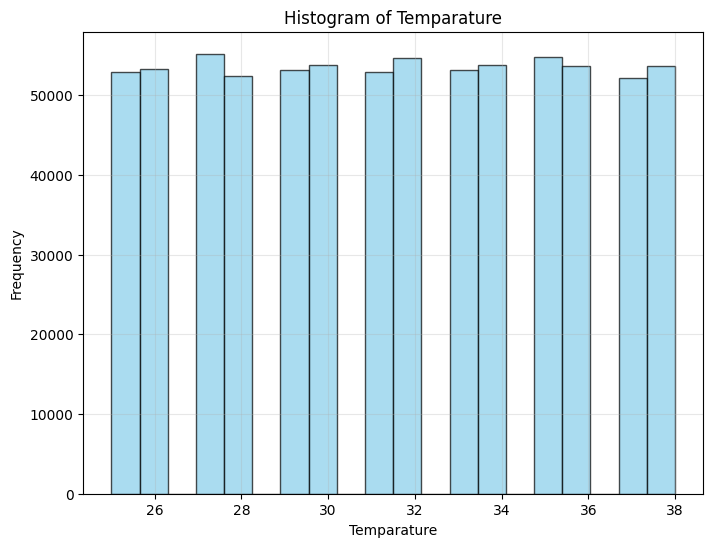

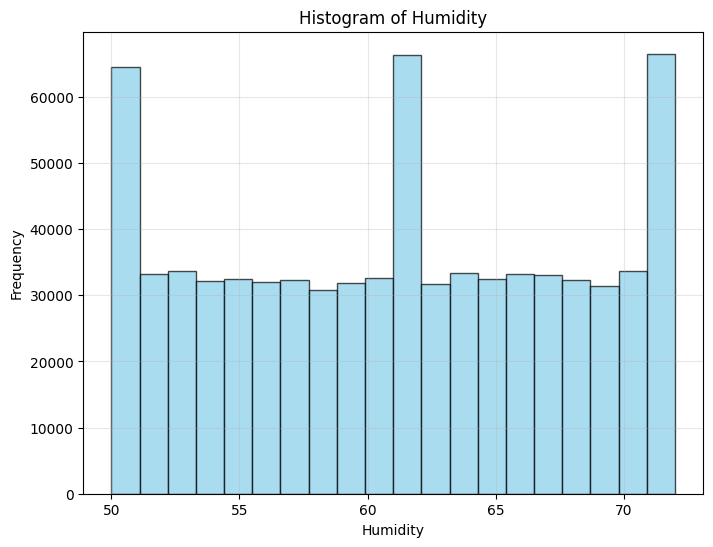

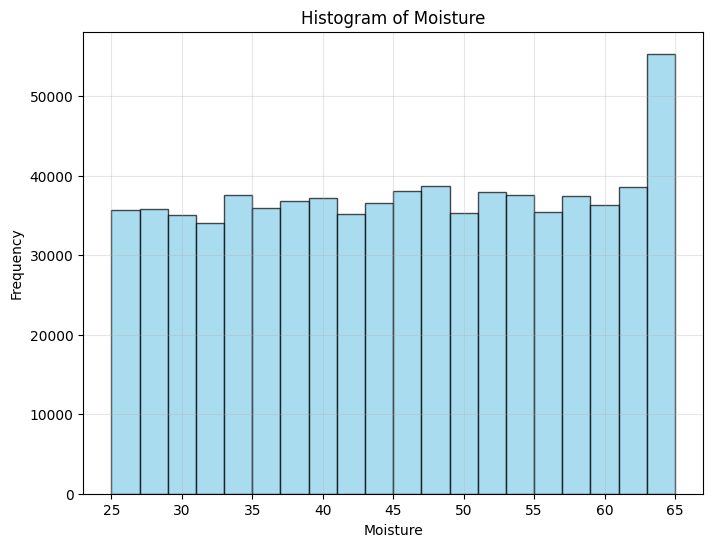

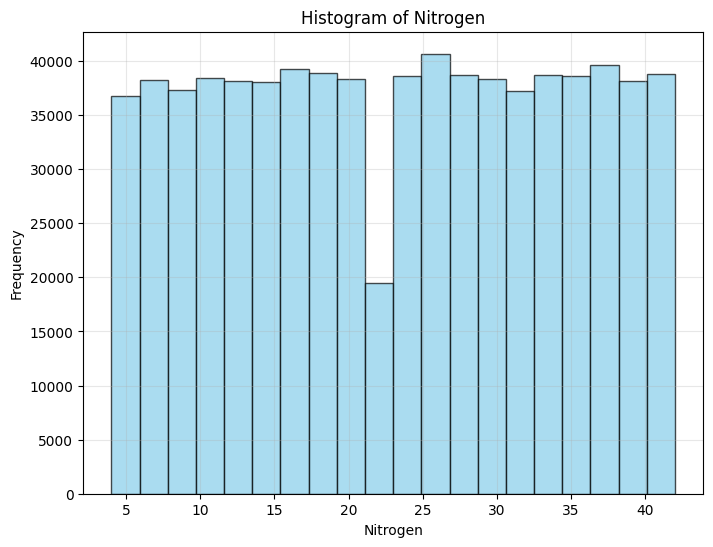

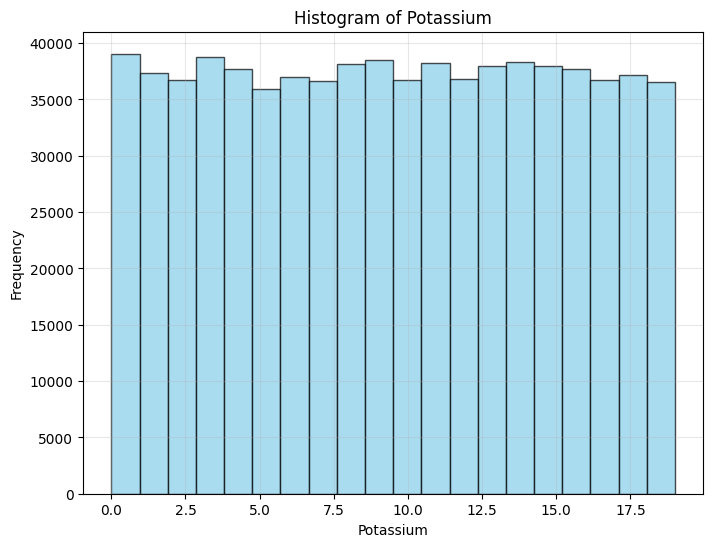

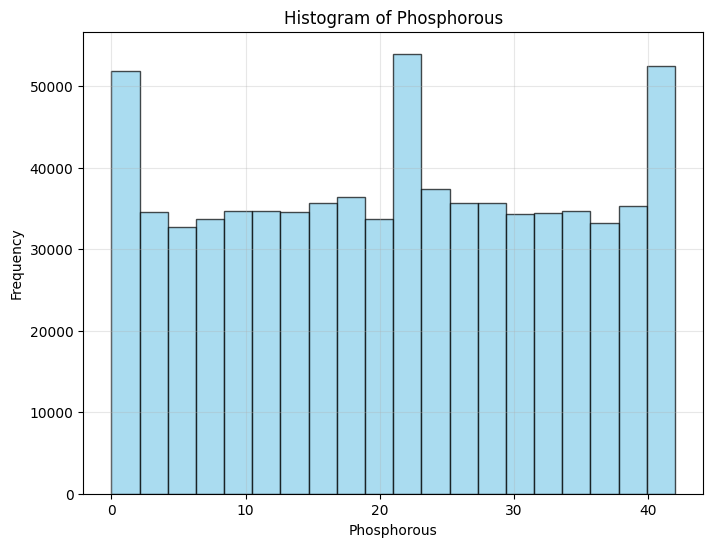

In [7]:
import matplotlib.pyplot as plt

# Plot histogram for each int64 column in separate figures
#for i, col in enumerate(int64_cols):
for col in int64_cols:
    plt.figure(figsize=(8, 6))
    plt.hist(df_train[col], bins=20, edgecolor='black', alpha=0.7, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.grid(True, alpha=0.3)
    plt.show()

A histogram helps you understand the distribution of a dataset. Here's how to interpret the results:

1. **X-axis (Bins)**: Represents the range of values in the dataset. Each bin groups a range of values (e.g., 0-10, 10-20).
2. **Y-axis (Frequency)**: Shows how many data points fall into each bin.
3. **Bar Height**: The taller the bar, the more data points fall within that range.
4. **Shape of Distribution**:
   - **Symmetrical**: Data is evenly distributed around a central value.
   - **Skewed Left/Right**: Data is concentrated on one side.
   - **Uniform**: All bins have similar frequencies.
   - **Bimodal/Multimodal**: Multiple peaks in the data.
5. **Outliers**: Bars far from the main distribution indicate unusual values.
6. **Spread**: The width of the distribution shows how varied the data is.

By analyzing the histogram, you can identify patterns, trends, and potential issues (e.g., missing data, outliers).

Based on the different distribution patterns in your int64 columns, here's how each type influences your model and analysis:

## **Uniform Distribution**
- **Impact**: Each value range appears equally, providing balanced representation
- **Benefits**: No bias toward specific values, good for model training
- **Considerations**: May indicate synthetic data or well-controlled experimental conditions

## **Single Low Frequency (Sparse Distribution)**
- **Impact**: Most values cluster in one range with few outliers
- **Risks**:
  - Model may overfit to the dominant range
  - Outliers might be treated as noise or anomalies
  - Poor generalization for rare value ranges
- **Solutions**: Consider feature scaling or outlier handling

## **Multimodal Distribution**
- **Impact**: Multiple peaks suggest distinct subgroups in your data
- **Implications**:
  - Different fertilizer application strategies
  - Seasonal or regional variations
  - Multiple crop types or soil conditions
- **Benefits**: Rich feature information for model learning
- **Risks**: Model complexity may increase

## **Recommendations**

Consider feature engineering like normalization, binning, or interaction terms based on these distribution patterns to improve model performance.


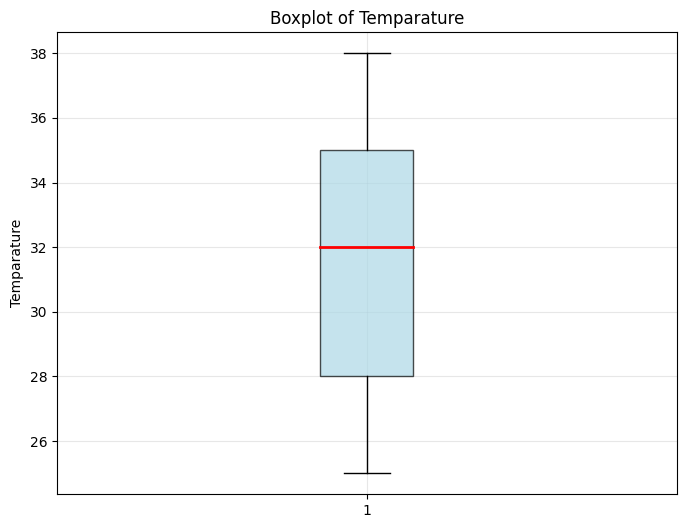

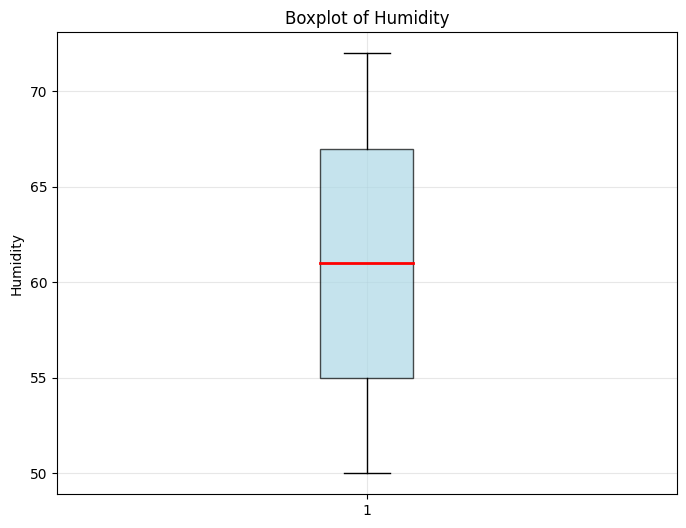

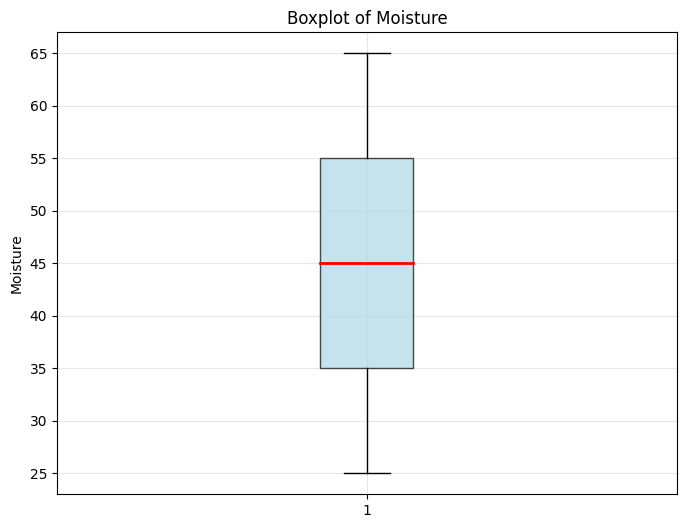

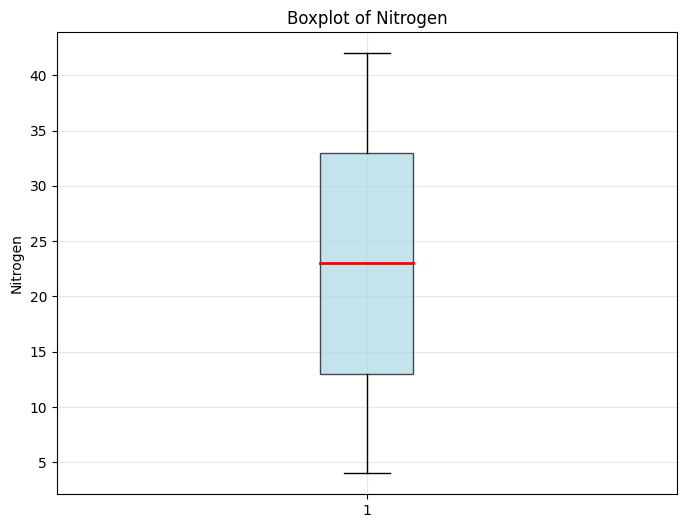

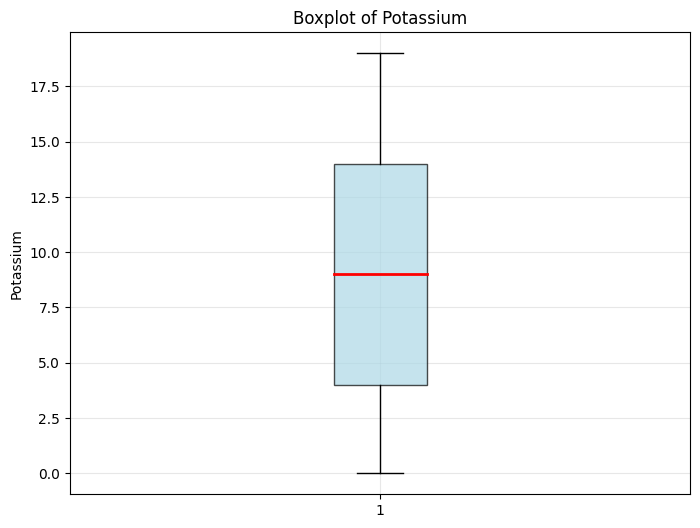

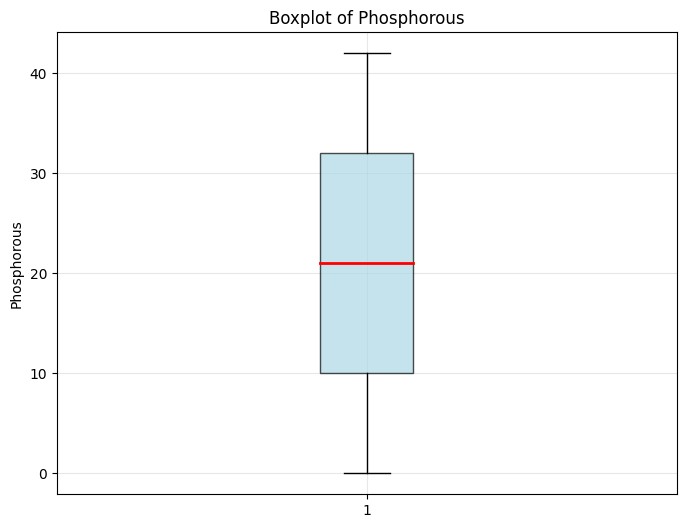

In [8]:
# Plot boxplot for each int64 column in separate figures
for col in int64_cols:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df_train[col], patch_artist=True,
                boxprops=dict(facecolor='lightblue', alpha=0.7),
                medianprops=dict(color='red', linewidth=2))
    plt.title(f'Boxplot of {col}')
    plt.ylabel(col)
    plt.grid(True, alpha=0.3)
    plt.show()

A boxplot summarizes the distribution of a dataset and highlights its key statistical properties. Here's how to interpret it:

1. **Box (Interquartile Range, IQR)**:
   - The box represents the middle 50% of the data.
   - **Bottom edge**: 25th percentile (Q1).
   - **Top edge**: 75th percentile (Q3).

2. **Median (Red Line)**:
   - The horizontal line inside the box shows the median (50th percentile).

3. **Whiskers**:
   - Extend to the smallest and largest values within 1.5 * IQR from Q1 and Q3.
   - Values beyond the whiskers are considered potential outliers.

4. **Outliers (Dots)**:
   - Points outside the whiskers indicate data points that are unusually high or low.

5. **Spread**:
   - The height of the box and whiskers shows the variability in the data.
   - A taller box indicates more spread in the middle 50% of the data.

6. **Symmetry**:
   - If the median is centered in the box and whiskers are of equal length, the data is symmetric.
   - Skewness is indicated by an off-center median or uneven whiskers.

Boxplots are useful for identifying outliers, comparing distributions, and understanding data spread.

In [9]:
# Check skewness values for confirmation
for col in int64_cols:
    skew_value = df_train[col].skew()
    print(f"{col}: Skewness = {skew_value:.3f}")
    if abs(skew_value) < 0.5:
        print(f"  → Approximately symmetric")
    elif skew_value > 0.5:
        print(f"  → Right-skewed")
    elif skew_value < -0.5:
        print(f"  → Left-skewed")
    print()

Temparature: Skewness = -0.002
  → Approximately symmetric

Humidity: Skewness = -0.008
  → Approximately symmetric

Moisture: Skewness = -0.018
  → Approximately symmetric

Nitrogen: Skewness = -0.006
  → Approximately symmetric

Potassium: Skewness = -0.004
  → Approximately symmetric

Phosphorous: Skewness = -0.010
  → Approximately symmetric

